# **Drug Classification Prediction**
The models used are:

wulan & aliza tinggal pilih yang mana

*   Linear Logistic Regression
*   K Neighbours
*   Linear Support Vector Machine (SVM)
*   Naive Bayes (Categorical)
*   Decision Tree
*   Random Forest





# **Import Library**

In [107]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [108]:
# read file
df = pd.read_csv('drug200.csv') 
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Remove Missing Data
- Menghapus baris yang mengandung missing data/ missing value , dengan menetapkan axis = 0

In [109]:
# Hapus kolom dengan missing value
df = df.dropna(axis=0)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


- Menghapus kolom yang mengandung missing data/ missing value , dengan menetapkan axis = 1

In [110]:
# Hapus kolom dengan missing value
df = df.dropna(axis=1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [111]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ KB
None


## Dari hasil di atas, tidak ada nilai yang hilang (*missing value*) dalam dataset ini

# **Eksplorasi Data**

## *Kategori Kolom*

In [112]:
#Kolom Umur (Age of the Patient)
df.Age.value_counts()

47    8
49    7
23    7
28    7
39    6
32    6
50    5
37    5
22    5
60    5
58    5
45    4
42    4
43    4
57    4
51    4
56    4
61    4
65    4
67    4
68    4
72    4
41    4
74    4
26    4
36    4
34    4
20    4
31    4
24    4
38    3
70    3
69    3
18    3
64    3
59    3
40    3
15    3
53    3
35    3
16    3
46    2
29    2
73    2
52    2
62    2
55    2
48    2
66    2
19    2
17    1
54    1
63    1
21    1
30    1
25    1
33    1
Name: Age, dtype: int64

In [113]:
#Kolom Jenis Kelamin (Sex, Gender of the patients)
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [114]:
#Kolom Tekanan Darah (Blood Pressure Levels)
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [115]:
#Kolom Kolesterol (Cholesterol Levels)
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [116]:
#Kolom Na_to_K/Natrium ke Kalium (Sodium to potassium Ration in Blood)
df.Na_to_K.value_counts()

12.006    2
18.295    2
10.444    1
19.416    1
12.703    1
         ..
15.969    1
15.156    1
22.456    1
13.598    1
9.894     1
Name: Na_to_K, Length: 198, dtype: int64

In [117]:
#Kolom Drug
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

# **Describe Data**

In [118]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [119]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [120]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

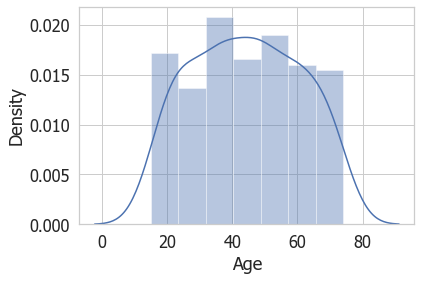

In [121]:
sns.distplot(df['Age'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

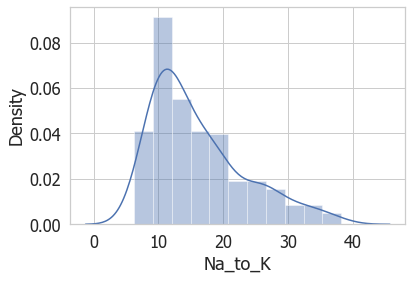

In [122]:
sns.distplot(df['Na_to_K'])

## Distribusi kolom 'Age' adalah simetris, karena nilai skewness antara -0,5 dan 0,5 Distribusi kolom 'Na_to_K' cukup miring, karena nilai skewness antara 0,5 dan 1. Dapat juga dilihat pada histogram kolom 'Na_to_K'

# **EDA (Exploratory Data Analysis)**

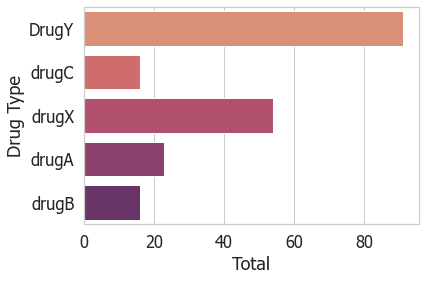

In [123]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Drug",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="flare") 
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

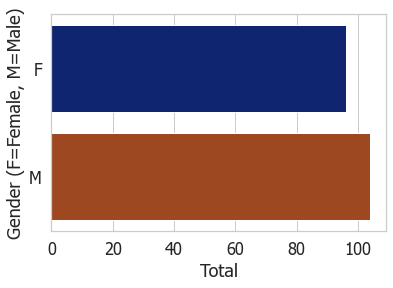

In [124]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Sex",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="dark") 
plt.ylabel('Gender (F=Female, M=Male)')
plt.xlabel('Total')
plt.show()

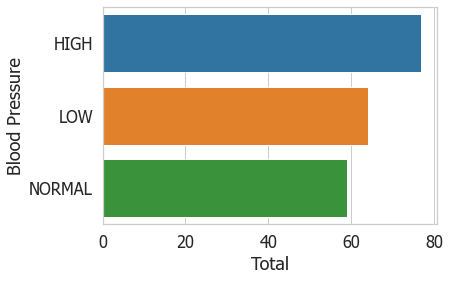

In [125]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="BP",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="tab10") 
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

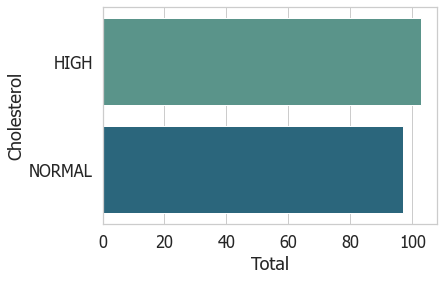

In [126]:
# Menentukan tema visual untuk semua plot matplotlib dan seaborn. ex: whitegrid, darkgrid, dark, white
# https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", font='tahoma', font_scale=1.5)
# Menunjukkan jumlah pengamatan di setiap kategori menggunakan bar.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(
    # nama kolom
    y="Cholesterol",
    # data yang di load
    data=df,
    # warna palette ex: flare, dark, pastel, muted, deep, tab10, crest, magma
    palette="crest") 
plt.ylabel('Cholesterol')
plt.xlabel('Total')
plt.show()

In [127]:
# Hitung tabulasi silang sederhana dari dua (atau lebih) faktor. Secara default menghitung tabel frekuensi faktor kecuali array nilai dan fungsi agregasi dilewatkan.
# https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
# Tampilan sederhana
# Tampilan sederhana kolom "Sex" & "Drug"
pd.crosstab(df.Sex,df.Drug)

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


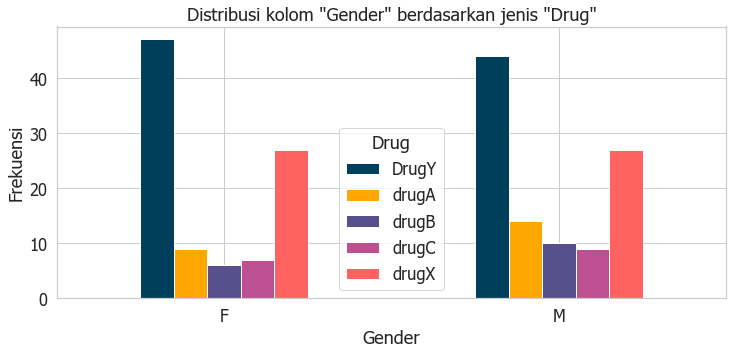

In [128]:
# Tampilan menggunakan plot
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title ('Distribusi kolom "Gender" berdasarkan jenis "Drug"')
plt.xlabel('Gender')
# Rotasi tulisan F & M
plt.xticks(rotation=0)
plt.ylabel('Frekuensi')
plt.show()

In [129]:
# Hitung tabulasi silang sederhana dari dua (atau lebih) faktor. Secara default menghitung tabel frekuensi faktor kecuali array nilai dan fungsi agregasi dilewatkan.
# https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
# Tampilan sederhana kolom "BP" dan "Cholesterol"
pd.crosstab(df.BP,df.Cholesterol)

Cholesterol,HIGH,NORMAL
BP,,
HIGH,35,42
LOW,31,33
NORMAL,37,22


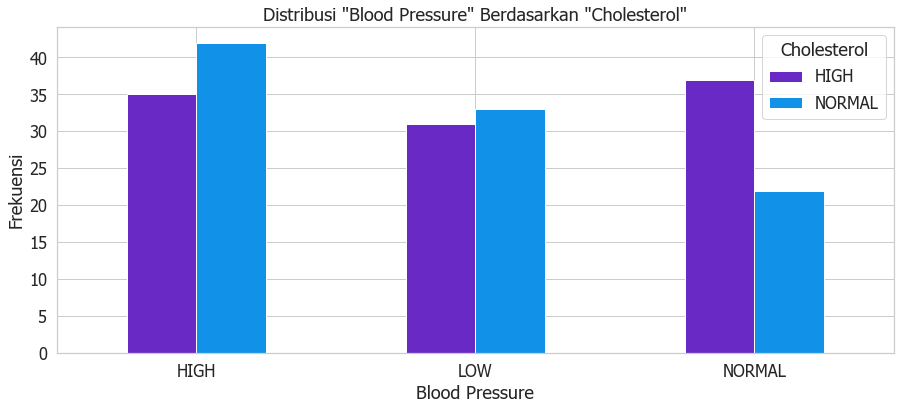

In [130]:
# Tampilan menggunakan plot
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Distribusi "Blood Pressure" Berdasarkan "Cholesterol"')
plt.xlabel('Blood Pressure')
# Rotasi tulisan HIGH, LOW, & NORMAL
plt.xticks(rotation=0)
plt.ylabel('Frekuensi')
plt.show()

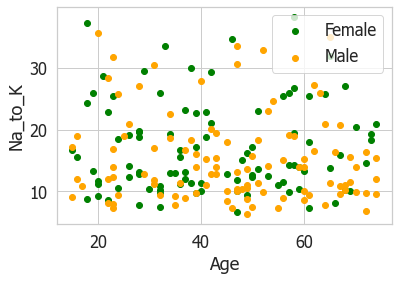

In [131]:
# fungsi scatter() untuk menggambar plot pencar.
# https://www.w3schools.com/python/matplotlib_scatter.asp
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Green")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# **Data Preprocessing**